## Need to import the Morse class

In [1]:
from src.morse import Morse

## Initialize Morse class

In [2]:
data = Morse()

In [3]:
file = "../../Data/artefact_31_test/curvature/31_r1.00_n4_v256.volume.ply"

import cProfile
import pstats

with cProfile.Profile() as pr:
    data.load_mesh_ply(file, quality_index=3, inverted=True)
    
stats = pstats.Stats(pr)
stats.sort_stats(pstats.SortKey.TIME)
stats.print_stats()

load_mesh_ply took 19.50884 seconds to execute!


AttributeError: 'Stats' object has no attribute 'print'

         29675725 function calls (29675681 primitive calls) in 19.509 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    7.554    7.554   19.374   19.374 /home/jp/Documents/Code/MorseTheory/src/Algorithms/LoadData/read_ply.py:22(read_ply)
   730860    4.836    0.000    5.308    0.000 /home/jp/Documents/Code/MorseTheory/src/Algorithms/LoadData/Datastructure.py:180(set_fun_val)
  2631124    1.618    0.000    2.436    0.000 /home/jp/anaconda3/lib/python3.9/site-packages/plyfile.py:984(_read_array)
        2    1.014    0.507    5.756    2.878 /home/jp/anaconda3/lib/python3.9/site-packages/plyfile.py:727(_read_bin)
   438518    0.787    0.000    2.199    0.000 /home/jp/anaconda3/lib/python3.9/site-packages/plyfile.py:938(_read_bin)
  1754088    0.657    0.000    2.327    0.000 /home/jp/anaconda3/lib/python3.9/site-packages/plyfile.py:850(_read_bin)
  2631124    0.636    0.000    0.636    0.000 {built-in method numpy.f

In [5]:
with cProfile.Profile() as pr:
    data.ProcessLowerStars()
    
stats = pstats.Stats(pr)
stats.sort_stats(pstats.SortKey.TIME)
stats.print_stats()

ProcessLowerStars took 6.79319 seconds to execute!
         32161030 function calls in 6.793 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  4371831    1.388    0.000    2.146    0.000 /home/jp/Documents/Code/MorseTheory/src/Algorithms/LoadData/Datastructure.py:195(has_face)
        1    1.122    1.122    6.793    6.793 /home/jp/Documents/Code/MorseTheory/src/Algorithms/ProcessLowerStars.py:84(ProcessLowerStars)
  1677213    0.771    0.000    2.578    0.000 /home/jp/Documents/Code/MorseTheory/src/Algorithms/ProcessLowerStars.py:54(num_unpaired_faces)
   146174    0.697    0.000    1.041    0.000 /home/jp/Documents/Code/MorseTheory/src/Algorithms/ProcessLowerStars.py:20(lower_star)
 11669216    0.449    0.000    0.449    0.000 {built-in method builtins.len}
  4135767    0.439    0.000    0.439    0.000 {method 'issubset' of 'set' objects}
   547937    0.285    0.000    0.356    0.000 /home/jp/Documents/Code/MorseTheory/src

In [6]:
with cProfile.Profile() as pr:
    data.ExtractMorseComplex()
    
stats = pstats.Stats(pr)
stats.sort_stats(pstats.SortKey.TIME)
stats.print_stats()

ExtractMorseComplex took 4.88222 seconds to execute!
         13392564 function calls in 4.882 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   377021    2.230    0.000    2.854    0.000 /home/jp/Documents/Code/MorseTheory/src/Algorithms/ExtractMorseComplex.py:19(potential_cells)
        1    1.450    1.450    4.882    4.882 /home/jp/Documents/Code/MorseTheory/src/Algorithms/ExtractMorseComplex.py:41(ExtractMorseComplex)
  5474794    0.525    0.000    0.525    0.000 {method 'issubset' of 'set' objects}
   778436    0.160    0.000    0.160    0.000 /home/jp/Documents/Code/MorseTheory/src/Algorithms/Tree.py:45(__init__)
  1839583    0.102    0.000    0.102    0.000 {method 'append' of 'list' objects}
  1923418    0.099    0.000    0.099    0.000 {method 'add' of 'set' objects}
   422805    0.088    0.000    0.115    0.000 /home/jp/Documents/Code/MorseTheory/src/Algorithms/Tree.py:55(addNode)
  1267880    0.088    0.000    0

##  Load ply file into the Morse class
Use the function: **.load_mesh_ply(filename, quality_index, inverted=False)**

- **filename:** The path to the ply file you want to load
- **quality_index:** The position index where the Morse function value are saved in the ply file (e.g. 3 if you want the quality value and the plyfile has the properties x,y,z,quality; or if you want to take the height function/z-value: choose 2)
- **inverted:** Optional, default is false. Multiplies the Morse function with -1 -> min will become max and max will become min.

In [3]:
file = "../../Data/test_objects/cube_large_r0.30_n4_v256.volume.ply"
#file = "../../Data/vase_reduced_cleaned.ply"
#file = "../../Data/artefact_31_test/curvature/31_r1.00_n4_v256.volume.ply"
#file = "../../Data/graz/steinbruchwand_ttvc_gmo_2022-11-05_0934/Steinbruchwand_TTVC_GMO_cut_150x200_r15.00_n4_v256.volume.ply"
data.load_mesh_ply(file, quality_index=3, inverted=True)
data.ProcessLowerStars()
data.ExtractMorseComplex()
#data.ReduceMorseComplex(0.04)
#pers = 0.06
#data.ExtractMorseCells(pers)
labelfilename = "../old_MorseTheory/Data/results/test_new_mscomplex_visualization"
data.plot_MorseComplex_ply(0,labelfilename, detailed=True)

load_mesh_ply took 0.58351 seconds to execute!
ProcessLowerStars took 0.09527 seconds to execute!
ExtractMorseComplex took 0.15553 seconds to execute!
plot_MorseComplex_ply took 0.42187 seconds to execute!


In [8]:
edge_file = "../old_MorseTheory/Data/results/test_0075_005_edges"
data.plot_SalientEdges_ply(edge_file, 0.075,0.05, only_strong=True)

get_salient_edges took 0.04770302772521973 seconds to execute!
plot_SalientEdges_ply took 0.08980488777160645 seconds to execute!


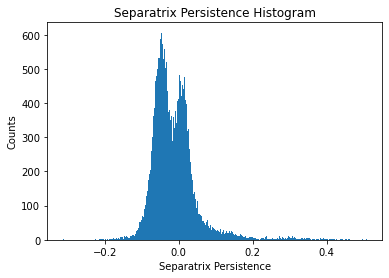

salient_edge_statistics took 0.24988698959350586 seconds to execute!


In [7]:
stat = data.salient_edge_statistics(nb_bins = 300, log=False, save = False, filepath = 'histogram', show = True)

In [9]:
filename = "../old_MorseTheory/Data/results/test_006_0075_005_05_seg"
data.Segmentation(0.06, 0.075, 0.05, 0.5, minimum_labels=3)
data.plot_Segmentation_label_txt(0.06, 0.075, 0.05, 0.5, filename)

get_salient_edges took 0.04992222785949707 seconds to execute!
Time Segmentation:  0.5458341579997068
Segmentation took 0.5958964824676514 seconds to execute!
plot_Segmentation_label_txt took 0.06621932983398438 seconds to execute!


## Dataset info (Optional)
Prints out info like Vertices, Edges and Faces, as well as the Morse function range

In [6]:
data

+-------------------------------------------------------
| Mesh Info
+-------------------------------------------------------
| Filename: ../../Data/test_objects/cube_large_r0.30_n4_v256.volume
| Morse function values range: [-0.0958464965224266, 0.6587028503417969]
+-------------------------------------------------------
| Number of Vertices: 6146
| Number of Edges: 18432
| Number of Faces: 12288
+-------------------------------------------------------
| Euler characteristic: 2
| Betti numbers: None
+-------------------------------------------------------


In [5]:
data.MorseComplex

+-------------------------------------------------------
| MorseComplex Info
+-------------------------------------------------------
| Filename: ../../Data/test_objects/cube_large_r0.30_n4_v256.volume
| Persistence of this Complex: 0
+-------------------------------------------------------
| Number of Vertices: 396
| Number of Edges: 779
| Number of Faces: 385
+-------------------------------------------------------
| Euler characteristic: 2
| Betti numbers: None
+-------------------------------------------------------

## Perform Morse Complex Calculations
Use the functions **.ProcessLowerStars()** and **.ExtractMorseComplex()**
- **ProcessLowerStars()** calculates the discrete vector field
- **ExtractMorseComplex()** calculates the Morse complex, so finds the neighborhood relations between critical simplices by finding separatrices from maxima to saddles and from saddles to minima

In [ ]:
#data.calculate_BettiNumbers()

In [ ]:
#data.plot_PersistenceDiagram(save = False, filepath = '../../Data/test_plotting_functions/persistenceDiagram_original')

In [ ]:
#data.calculate_BettiNumbers(0.04)

In [ ]:
#data.plot_PersistenceDiagram(0.04,save = False, filepath = '../../Data/test_plotting_functions/persistenceDiagram_0_04P')

In [ ]:
#stats = data.funval_statistics(nb_bins=200, log=True)

In [ ]:
#print("Stats all fun vals:")
#print(stats['mean'])
#print(stats['std'])

In [ ]:
#stats2 = data.critical_funval_statistics(0,nb_bins=200)

In [ ]:
#print("Stats V:")
#print(stats2['V']['mean'])
#print(stats2['V']['std'])
#print("Stats E:")
#print(stats2['E']['mean'])
#print(stats2['E']['std'])
#print("Stats F:")
#print(stats2['F']['mean'])
#print(stats2['F']['std'])

In [ ]:
#stats3 = data.critical_funval_statistics(0.04,nb_bins=200)

In [ ]:
#print("Stats V:")
#print(stats3['V']['mean'])
#print(stats3['V']['std'])
#print("Stats E:")
#print(stats3['E']['mean'])
#print(stats3['E']['std'])
#print("Stats F:")
#print(stats3['F']['mean'])
#print(stats3['F']['std'])

In [ ]:
#import matplotlib.pyplot as plt
#funvals = []
#for e in stats2['V']['fun_vals']:
#    funvals.append(e)
#for e in stats2['E']['fun_vals']:
#    funvals.append(e)
#for e in stats2['F']['fun_vals']:
#    funvals.append(e)
    
#plt.hist(funvals, bins=200)
#plt.xlabel("Function Value")
#plt.ylabel("Counts")
#plt.title("Combined Histogram")
#plt.show()

In [ ]:
#funvals = []
#for e in stats3['V']['fun_vals']:
#    funvals.append(e)
#for e in stats3['E']['fun_vals']:
#    funvals.append(e)
#for e in stats3['F']['fun_vals']:
#    funvals.append(e)
#    
#plt.hist(funvals, bins=200)
#plt.xlabel("Function Value")
#plt.ylabel("Counts")
#plt.title("Combined Histogram")
#plt.show()

In [ ]:
#data.plot_SalientEdges_ply("../../Data/test_plotting_functions/plot_saledge", 0.06, 0.05)
#data.plot_MorseCells_ply(0.04, "../../Data/test_plotting_functions/plot_cells")
#data.plot_MorseComplex_ply(0.04, "../../Data/test_plotting_functions/plot_complex")

In [ ]:
#stats = data.salient_edge_statistics()

In [ ]:
#print("Stats sepa persistence:")
#print(stats['mean'])
#print(stats['std'])

## Get Morse Complex info (Optional)
Prints out infos on the original Morse complex like number of critical vertices, crit. edges and crit. faces. Persistence should be 0 on the original complex.

In [ ]:
data.MorseComplex.info()

In [ ]:
#labelfile_name = "../../Data/vase_cells_only_label" # the .txt extension is written automatically
#labelfile_name = "../../Data/31_only_label" # the .txt extension is written automatically
labelfile_name = "../../Data/test_objects/cube_large_0_01"

data.ExtractMorseCells(0.01)
data.plot_MorseCells_label_txt(0.01, labelfile_name)
data.plot_MorseCells_ply(0.01, labelfile_name)
data.plot_MorseComplex_ply(0.01, labelfile_name, path_color=[200,200,200])

## Reduce Morse complex (using Persistence)
Use the function **.ReduceMorseComplex(persistence)**
- **persistence:** The persistence level up to which the Morse complex should be simplified. (neighboring critical simplices will be cancelled, (if topologically possible,) if their Morse function value difference is less than the persistence.

The reduced complex will be stored in a dictionary **data.reducedMorseComplexes[persistence]** which allows to calculate several persistences. Can be accessed using the persistence as key.

In [ ]:
#data.ExtractMorseCells(0.04)
#filename = "../../Data/31_testnew_segmentation_no_persistence"
#seg = data.Segmentation(0, 0.06, 0.05, 0.15, minimum_labels=5)
#data.plot_Segmentation_label_txt(0, 0.06, 0.05, 0.15, filename)

In [ ]:
#print(len(seg.Cells.keys()))

In [ ]:
#labelfile_name = "../../Data/vase_cells_only_label_001" # the .txt extension is written automatically
#labelfile_name = "../../Data/31_only_label_004" # the .txt extension is written automatically

#data.ExtractMorseCells(0.04)
#data.write_MorseCellLabels(0.04, labelfile_name)

## Plot option for Gigamesh (there are several also for writing meshlab overlay files..)
Uses a labels for each Morse cell to write a label file which can be read by Gigamesh for visualization.
Need to Extract Morse cells first with **.ExtractMorseCells(persistence)** and than **.write_MorseCellLabels(persistence, filename)** to write the according label file. 
- **persistence:** The persistence of the Morse complex you want to visualize
- **filename:** filename where the label file should be stored

In [ ]:
#labelfile_name = "abc_labels" # the .txt extension is written automatically

#data.ExtractMorseCells(3)
#data.write_MorseCellLabels(3, labelfile_name)

## Visualize in Gigamesh:
(Maybe the develop version of gigamesh is required, since import labels migth not be in the website version)
1. Load the ply file into Gigamesh
2. Choose Import labels under **File - Import - Import Labels** and load the written output label file
3. Vertex in first column: YES 
4. Select **Labels-Connected Comp.** on the right to see the Morse cells of the Morse complex

In [ ]:
import sys
import numpy as np

a=float(0.275369)
b = np.float16(0.275369)
#b = b.astype(np.int32)

print(type(a))
print(sys.getsizeof(a))


print(type(b))
print(sys.getsizeof(b))
import array
b= [1,2,3,0]
c = np.array([1,2,3,0],dtype=np.int8)
a = array.array('L',[1,2,3,0])
print(sorted(a))
print(sys.getsizeof(a))
print(sys.getsizeof(sorted(a)))
print(sys.getsizeof(b))
print(sys.getsizeof(c))
if 2 in a:
    print("ok")
print(a[0])